#1 Author

Student Name: Sheraaz Aslam
Student Number: 190452500

#2 Problem Formulation
In this section, we outline the fundamental aspect of our coursework.

Objective:The primary objective is to develop a machine learning model capable of accurately classifying food images into two categories: vegetarian and non-vegetarian and vegan dishes. The model aims to leverage extracted image features to distinguish between these two types of dishes.

#3. Machine Learning Pipeline for Vegetarian vs. Non-Vegetarian and Vegan Classification**

Embarking on the binary task of distinguishing between vegetarian and non-vegetarian dishes, I'll tailor a robust pipeline with diverse methodologies. Recognizing the challenge, especially when dishes may have nuanced characteristics, I aim to extend the model for improved classification.


1. Data Preparation:
   - Ensure standardized image formats.
   - Derive relevant features, building upon the successful components from the previous model.
   - Explore additional features if needed.

2. Classification Models:

a. Linear Classification:
   - Frame the task as linear classification, considering a multi-dimensional feature space.
   - Utilize a predictor vector (x=[1, x_1, x_2, ...]^T) and a coefficient vector (w=[w_0, w_1, w_2, ...]^T).
   - Evaluate model performance using a confusion matrix to identify misclassifications.

b. Logistic Regression:
   - Assess the efficacy of logistic regression for binary problem-solving in the new context.

c. kNN Algorithm:
   - Adapt the kNN algorithm, considering dataset size and potential overfitting.

Post-initial tests, exploration into fine-tuning and additional methods will be conducted to optimize and enhance the existing pipeline for accurate classification of vegetarian and non-vegetarian dishes.

#4 Transformation Phase
During the first part of the transformation, I'm granted access to two datasets on my Google Drive: one containing 99 photos and their descriptions. The decision-making process for choosing the appropriate dataset becomes pivotal.

Considerations influencing my choice:

Impact of Dataset Size:

1. With a smaller dataset of 99 photos, there is a potential impact on accuracy due to limited training and testing data.
Handling Larger Samples:

2. Dealing with a larger dataset of 3250 photos poses challenges in extracting variables related to rice and chips. This could lead to errors during data manipulation and model training.
Binary Classification Context:

3. Since the problem is binary, achieving the desired accuracy with the smaller dataset is plausible.
Given these factors, I opt to proceed with the smaller dataset of 99 images.








In [ ]:
!pip install mlend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.2 MB/s eta 0:00:00


In [ ]:
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spkit as sp

from skimage import exposure
from skimage.color import rgb2hsv, rgb2gray
import skimage as ski

import mlend
from mlend import download_yummy_small, yummy_small_load

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
baseDir = download_yummy_small(save_to = '/content/drive/MyDrive/Data/MLEnd')
baseDir
os.listdir(baseDir)

100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|99\99|00099.jpg
Done!


['MLEndYD_images_small', 'MLEndYD_image_attributes_small.csv']

In [ ]:
MLENDYD_df = pd.read_csv('/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_image_attributes_small.csv').set_index('filename')
MLENDYD_df

,Dish_name,Home_restaurant,Cuisine,Ingredients,Diet,Healthiness_rating,How_much_did_you_like_it,Rice_Chips,Benchmark_A
filename,,,,,,,,,
00001.jpg,steak_&_fries,resturaunt,american,"steak,fries,mixed_salad",non-veg,neutral,strongly_like,chips,Test
00002.jpg,beef_burger_meal,restaurant,american,"chips,burger,chicken_nugget",non-veg,unhealthy,like,chips,Train
00003.jpg,chicken_burger_with_fries_and_wings,restaurant,american,"fried_chicken_breast,lettuce,ketchup,sesame_se...",non-veg,unhealthy,like,chips,Train
00004.jpg,fried_rice_with_curd,home,indian,"rice,onion,potato,tomato,olive_oil,curd",vegetarian,neutral,like,rice,Train
00005.jpg,fish_and_chips,tcr_bar,british,"cod,beer,flour,tartare_sauce,peas,oil",vegetarian,neutral,strongly_like,chips,Test
...,...,...,...,...,...,...,...,...,...
00095.jpg,breaded_chicken_with_katsu_curry_sauce_rice_&_...,the_curve,japanese,"chicken,curry,rice,greens,bell_pepper",non-veg,healthy,strongly_like,rice,Train
00096.jpg,chicken_wrap_with_fries,roosters_piri_piri,portuguese,"tortilla_wrap,chicken,olive_oil,piri_piri_sauc...",non-veg,healthy,strongly_like,chips,Train
00097.jpg,butter_chicken,restaurant,indian,"garlic,tomato,onion,white_rice,naan_bread,cash...",non-veg,neutral,like,rice,Train


In [ ]:
pip install mlend --upgrade

Now that we have our data in a DataFrame format, let's move on to the necessary transformations:

1. Splitting into Train/Test Datasets: - To provide a segregated environment for model training and evaluation, the dataset will be split into separate training and testing subsets.

2. Feature Extraction according to Pipeline: - By using the pre-established pipeline, features such as the image's yellow component and texture-related attributes will be extracted. In order to classify the data later on, this stage gathers relevant information.

3.Normalization of the Dataset: - Normalizing the retrieved features is essential to preserving scale consistency and avoiding the learning process being disproportionately impacted by any one feature.

These changes provide the framework for the next steps in our pipeline for machine learning, which makes it easier to create and evaluate models.

In [ ]:
count_vegetarian_or_non_veg = len(MLENDYD_df[MLENDYD_df['Diet'].isin(['vegetarian', 'non veg'])])

print(f'The number of entries with "vegetarian" or "non veg" in the Diet column: {count_vegetarian_or_non_veg}')


The number of entries with "vegetarian" or "non veg" in the Diet column: 19


In [ ]:
sample_path = '/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_images_small/*.jpg'
files = glob.glob(sample_path)
len(files)

99

In [ ]:
MLENDYD_df['Diet_encoded'] = np.where(MLENDYD_df['Diet'] == 'vegetarian', 1, 0)


In [ ]:
TrainSet, TestSet, Map = yummy_small_load(datadir_main=baseDir, train_test_split='Benchmark_A')

Total 99 found in /content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_images_small/


In [ ]:
# Displaying the keys in the training dataset
TrainSet.keys()

# Displaying the keys in the testing dataset
TestSet.keys()

# Examining the mapping of values
Map

# Saving the predictors
X_train_paths = TrainSet['X_paths']
X_test_paths = TestSet['X_paths']

In [ ]:
# Displaying the keys in the training dataset
print("TrainSet Keys:", TrainSet.keys())

# Displaying the keys in the testing dataset
print("TestSet Keys:", TestSet.keys())


TrainSet Keys: dict_keys(['X_paths', 'Y', 'Y_encoded'])
TestSet Keys: dict_keys(['X_paths', 'Y', 'Y_encoded'])


In [ ]:
# Map 'vegetarian' to 1 and 'non-veg' to 0 in TrainSet
TrainSet['Diet_encoded'] = np.where(TrainSet['Y'] == 'vegetarian', 1, 0)

# Map 'vegetarian' to 1 and 'non-veg' to 0 in TestSet
TestSet['Diet_encoded'] = np.where(TestSet['Y'] == 'vegetarian', 1, 0)


In [ ]:
# Assuming MLENDYD_df is your DataFrame with the 'Diet' column
# Map 'vegetarian' to 1 and 'non-veg' to 0
MLENDYD_df['Diet_encoded'] = np.where(MLENDYD_df['Diet'] == 'vegetarian', 1, 0)

# Assuming X_train_paths, Y_train, X_test_paths, and Y_test are already defined

# Creating training and testing datasets using 'Benchmark_A' field
TrainSet, TestSet, Map = yummy_small_load(datadir_main=baseDir, train_test_split='Benchmark_A')

# Map 'vegetarian' to 1 and 'non-veg' to 0 in TrainSet
TrainSet['Diet_encoded'] = np.where(TrainSet['Y'] == 'vegetarian', 1, 0)

# Map 'vegetarian' to 1 and 'non-veg' to 0 in TestSet
TestSet['Diet_encoded'] = np.where(TestSet['Y'] == 'vegetarian', 1, 0)

# Displaying the keys in the training dataset
TrainSet.keys()

# Displaying the keys in the testing dataset
TestSet.keys()

# Examining the mapping of values
Map


Total 99 found in /content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_images_small/


{'Rice_Chips': {'chips': 0, 'rice': 1}}

Define the functions that are needed to extract the features mentioned in the pipeline's first section next:

In [ ]:
from skimage.feature import graycomatrix, graycoprops
from skimage.color import rgb2gray, rgb2hsv
import matplotlib.pyplot as plt

def get_yellow_component(I, t1=27, t2=33):
    Ihsv = (rgb2hsv(I) * 255).astype('uint8')
    # Assuming 'Veg' corresponds to yellow color
    mask = (Ihsv[:, :, 0] < t2) & (Ihsv[:, :, 0] > t1)
    Ypx = mask.sum()
    return Ypx

def GMLC_features(I):
    Ig = (rgb2gray(I) * 255).astype('uint8')
    glcm = graycomatrix(Ig, distances=[5], angles=[0], levels=256, symmetric=True, normed=True)
    f1 = graycoprops(glcm, 'dissimilarity')[0, 0]
    f2 = graycoprops(glcm, 'correlation')[0, 0]
    return f1, f2

def showConfMat(CM, labels=['Veg', 'Non Veg']):
    plt.matshow(CM, cmap='Blues')
    for i in range(CM.shape[0]):
        for j in range(CM.shape[1]):
            plt.text(i, j, CM[i, j].round(2), ha='center',)
    plt.xticks([0, 1], labels)
    plt.yticks([0, 1], labels)
    plt.show()


We may now resize the images and take the necessary parts out of them.

In [ ]:
# This function makes the image square, ensuring uniformity for further processing
def make_it_square(I, pad=0):
    N, M, C = I.shape
    if N > M:
        Is = [np.pad(I[:, :, i], [(0, 0), (0, N - M)], 'constant', constant_values=pad) for i in range(C)]
    else:
        Is = [np.pad(I[:, :, i], [(0, M - N), (0, 0)], 'constant', constant_values=pad) for i in range(C)]

    return np.array(Is).transpose([1, 2, 0])

# This function resizes the image to the specified size
def resize_img(I, size=[100, 100]):
    N, M, C = I.shape
    Ir = [sp.core.processing.resize(I[:, :, i], size) for i in range(C)]
    return np.array(Ir).transpose([1, 2, 0])

# Modifying X_train and X_test for the purpose
X_train = []
for k, file in enumerate(X_train_paths):
    sp.utils.ProgBar_JL(k, len(X_train_paths), L=50, color='blue')
    I = plt.imread(file)
    I = make_it_square(I, pad=0)
    I = resize_img(I, size=[200, 200])
    X_train.append(I)

X_test = []
for k, file in enumerate(X_test_paths):
    sp.utils.ProgBar_JL(k, len(X_test_paths), L=50, color='blue')
    I = plt.imread(file)
    I = make_it_square(I, pad=0)
    I = resize_img(I, size=[200, 200])
    X_test.append(I)

# Modifying these from the (70, 200, 200, 3) shape to a (70, 2) shape
X_train_f = []
for k, I in enumerate(X_train):
    f1, f2 = GMLC_features(I)
    X_train_f.append([f1, f2])

X_test_f = []
for k, I in enumerate(X_test):
    f1, f2 = GMLC_features(I)
    X_test_f.append([f1, f2])


100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|70\70|
Done!
100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|29\29|
Done!


We can then move forward with normalization after that. That is necessary to maintain the scale's consistency, and it may have a significant impact on one of the methods I employ.

But first, I want to make sure that everything is proper and that the data is stored in the right format in my variables. In addition, I would prefer arrays than lists for my data:

In [ ]:
# Converting the feature lists to numpy arrays
X_train_f = np.array(X_train_f)
X_test_f = np.array(X_test_f)

# Displaying the shapes of the transformed datasets
print("Shape of X_train_f:", X_train_f.shape)
print("Shape of X_test_f:", X_test_f.shape)

# Displaying the first 9 rows of the transformed training data
print("First 9 rows of X_train_f:\n", X_train_f[:9])


Shape of X_train_f: (70, 2)
Shape of X_test_f: (29, 2)
First 9 rows of X_train_f:
 [[19.99087179  0.86575841]
 [18.09417949  0.88705262]
 [14.18966667  0.93661023]
 [13.4364359   0.92070604]
 [14.44702564  0.91778659]
 [16.75694872  0.90077952]
 [11.88366667  0.94629403]
 [14.42038462  0.91718851]
 [12.47517949  0.95498382]]


Next I will normalise the data:

In [ ]:
# Calculating the mean and standard deviation for normalization
MEAN = X_train_f.mean(0)
SD = X_train_f.std(0)

# Normalizing the features using mean and standard deviation
X_train_fx = (X_train_f - MEAN) / SD
X_test_fx = (X_test_f - MEAN) / SD

# Displaying the first 5 rows of the normalized test data
print("First 5 rows of X_test_fx after normalization:\n", X_test_fx[:5])

First 5 rows of X_test_fx after normalization:
 [[ 3.93708504 -3.88294198]
 [-0.54658026  0.50617956]
 [-0.77954263  0.71198842]
 [ 0.09328224  0.32008836]
 [ 0.78638001 -1.17677597]]


In [ ]:
# Creating training and testing datasets using 'Benchmark_A' field
TrainSet, TestSet, Map = yummy_small_load(datadir_main=baseDir, train_test_split='Benchmark_A')

# Displaying the keys in training dataset
TrainSet.keys()

# Displaying the keys in testing dataset
TestSet.keys()

# Examining the mapping of values
Map

# Saving the predictors
X_train_paths = TrainSet['X_paths']
X_test_paths  = TestSet['X_paths']

Y_train = TrainSet['Y_encoded']
Y_test  = TestSet['Y_encoded']

Map


Total 99 found in /content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_images_small/


{'Rice_Chips': {'chips': 0, 'rice': 1}}

Next I need to make sure the dimensions match and make sense:

In [ ]:
# Calculating the mean and standard deviation for normalization
MEAN = X_train_f.mean(0)
SD = X_train_f.std(0)

# Normalizing the features using mean and standard deviation
X_train_fx = (X_train_f - MEAN) / SD
X_test_fx = (X_test_f - MEAN) / SD

# Displaying the first 5 rows of the normalized test data
print("First 5 rows of X_test_fx after normalization:\n", X_test_fx[:5])


First 5 rows of X_test_fx after normalization:
 [[ 3.93708504 -3.88294198]
 [-0.54658026  0.50617956]
 [-0.77954263  0.71198842]
 [ 0.09328224  0.32008836]
 [ 0.78638001 -1.17677597]]


Next I need to make sure the dimensions match and make sense:

In [ ]:
# Ensure dimensions match for the training set
print("X_train_fx shape:", X_train_fx.shape)
print("Y_train shape:", Y_train.shape)

# Ensure dimensions match for the testing set
print("X_test_fx shape:", X_test_fx.shape)
print("Y_test shape:", Y_test.shape)

X_train_fx shape: (70, 2)
Y_train shape: (70,)
X_test_fx shape: (29, 2)
Y_test shape: (29,)


And then I do the final reshape of my arrays for using them later:

In [ ]:
# Reshape Y_train and Y_test to ensure dimensions match
Y_train = Y_train.reshape(-1, 1)
Y_test = Y_test.reshape(-1, 1)

# Check the shapes
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)


Y_train shape: (70, 1)
Y_test shape: (29, 1)


#5 Modelling

**Modelling**

**Model 1: Logistic Regression**
- Opting for logistic regression over linear classification due to the potentially non-linear decision boundary.
- The hypothesis function is given by $\ h_\theta(x) = \frac{1}{1 + e^{-(\theta^Tx + b)}}$
- Bias consideration is unnecessary when using libraries like scikit-learn.

**Model 2: k-Nearest Neighbors (k-NN)**
- Utilizing k-NN to simplify the problem into regression and classification.
- Choosing an odd k (e.g., 9 and 7) initially based on dataset size.



#6 Methodology

There are two approaches I could use in this situation. The simplest method to solve this problem, given its binary nature, is to use a confusion matrix. By doing so, we may determine the precise number of misclassified items and, thus, determine their correctness.

Regarding the current train/test split of the data, we also have the option to swap them and retrain the model.

Furthermore, grid search can be used to identify the optimal k among the k-neighbors.

#7 Dataset

My attempt will be to use the little dataset and evaluate its performance.

Functions that retract yellow component and texture-related properties have been defined thus far. Nevertheless, processing images takes a long time.





In [ ]:
from mlend import download_yummy, yummy_load
from PIL import Image  # Import the Image class from PIL

MLENDYD_big_df = pd.read_csv('/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_image_attributes_benchmark.csv').set_index('filename')
MLENDYD_big_df



,Diet,Cuisine_org,Cuisine,Dish_name,Home_or_restaurant,Ingredients,Healthiness_rating,Healthiness_rating_int,Likeness,Likeness_int,Benchmark_A
filename,,,,,,,,,,,
000001.jpg,non_vegetarian,japanese,japanese,chicken_katsu_rice,marugame_udon,"rice,chicken_breast,spicy_curry_sauce",neutral,3.0,like,4.0,Train
000002.jpg,non_vegetarian,english,english,english_breakfast,home,"eggs,bacon,hash_brown,tomato,bread,tomato,bake...",unhealthy,2.0,like,4.0,Train
000003.jpg,non_vegetarian,chinese,chinese,spicy_chicken,jinli_flagship_branch,"chili,chicken,peanuts,sihuan_peppercorns,green...",neutral,3.0,strongly_like,5.0,Train
000004.jpg,vegetarian,indian,indian,gulab_jamun,home,"sugar,water,khoya,milk,salt,oil,cardamon,ghee",unhealthy,2.0,strongly_like,5.0,Train
000005.jpg,non_vegetarian,indian,indian,chicken_masala,home,"chicken,lemon,turmeric,garam_masala,coriander_...",healthy,4.0,strongly_like,5.0,Train
...,...,...,...,...,...,...,...,...,...,...,...
003246.jpg,vegetarian,indian,indian,zeera_rice,home,"1_cup_basmati_rice,2_cups_water,2_tablespoons_...",healthy,4.0,strongly_like,5.0,Train
003247.jpg,vegetarian,indian,indian,paneer_and_dal,home,"fried_cottage_cheese,ghee,lentils,milk,wheat_f...",healthy,4.0,strongly_like,5.0,Test
003248.jpg,vegetarian,indian,indian,samosa,home,"potato,onion,peanut,salt,turmeric_powder,red_c...",very_unhealthy,1.0,like,4.0,Test


lets remove the indexes that are not required:

In [ ]:
# Create a new DataFrame with rows that meet the condition
filtered_df = MLENDYD_big_df[MLENDYD_big_df['Ingredients'].str.contains('rice', case=False) | MLENDYD_big_df['Ingredients'].str.contains('chips', case=False)]
count_entries = len(filtered_df)
print(f'The number of entries in the new DataFrame: {count_entries}')
# Print or further process the new DataFrame
filtered_df

The number of entries in the new DataFrame: 810


,Diet,Cuisine_org,Cuisine,Dish_name,Home_or_restaurant,Ingredients,Healthiness_rating,Healthiness_rating_int,Likeness,Likeness_int,Benchmark_A
filename,,,,,,,,,,,
000001.jpg,non_vegetarian,japanese,japanese,chicken_katsu_rice,marugame_udon,"rice,chicken_breast,spicy_curry_sauce",neutral,3.0,like,4.0,Train
000016.jpg,vegan,indian,indian,khichdi,home,"rice,spices,herbs",healthy,4.0,neutral,3.0,Test
000020.jpg,vegetarian,indian,indian,lentil-based_vegetable_stew_with__rice,home,ingredients:\nfor_cooking_rice:\n1_cup_rice_(a...,healthy,4.0,like,4.0,Test
000021.jpg,non_vegetarian,asian,asian,biryani,home,"mutton,rice,onion,tomato,red_chilli_powder,sal...",healthy,4.0,strongly_like,5.0,Train
000022.jpg,vegetarian,indian,indian,rice_beetroot_curry,home,"rice,beetroot,salt,spices",very_healthy,5.0,neutral,3.0,Train
...,...,...,...,...,...,...,...,...,...,...,...
003234.jpg,vegetarian,indian,indian,rasam_rice,home,"garlic,curry_leaves,green_chilli,cumin,black_p...",very_healthy,5.0,strongly_like,5.0,Test
003235.jpg,non_vegetarian,singapore,singaporean,singapore_style_noodles,asda,"cooked_rice_noodles,roasted_chicken,water,red_...",very_healthy,5.0,like,4.0,Test
003243.jpg,vegetarian,british,british,pan-fried_beef_with_rice,restaurant,"rice,corn,beef,red_cabbage",healthy,4.0,dislike,2.0,Train


In [ ]:
# Filter rows that do not contain both 'rice' and 'chips' in the 'Ingredients' column
filtered_df = filtered_df[~(filtered_df['Ingredients'].str.contains('rice', case=False) & filtered_df['Ingredients'].str.contains('chips', case=False))]

# Count the number of entries in the new DataFrame after filtering
count_entries = len(filtered_df)
print(f'The number of entries in the new DataFrame: {count_entries}')

# Print or further process the new DataFrame and the count
filtered_df


The number of entries in the new DataFrame: 809


,Diet,Cuisine_org,Cuisine,Dish_name,Home_or_restaurant,Ingredients,Healthiness_rating,Healthiness_rating_int,Likeness,Likeness_int,Benchmark_A
filename,,,,,,,,,,,
000001.jpg,non_vegetarian,japanese,japanese,chicken_katsu_rice,marugame_udon,"rice,chicken_breast,spicy_curry_sauce",neutral,3.0,like,4.0,Train
000016.jpg,vegan,indian,indian,khichdi,home,"rice,spices,herbs",healthy,4.0,neutral,3.0,Test
000020.jpg,vegetarian,indian,indian,lentil-based_vegetable_stew_with__rice,home,ingredients:\nfor_cooking_rice:\n1_cup_rice_(a...,healthy,4.0,like,4.0,Test
000021.jpg,non_vegetarian,asian,asian,biryani,home,"mutton,rice,onion,tomato,red_chilli_powder,sal...",healthy,4.0,strongly_like,5.0,Train
000022.jpg,vegetarian,indian,indian,rice_beetroot_curry,home,"rice,beetroot,salt,spices",very_healthy,5.0,neutral,3.0,Train
...,...,...,...,...,...,...,...,...,...,...,...
003234.jpg,vegetarian,indian,indian,rasam_rice,home,"garlic,curry_leaves,green_chilli,cumin,black_p...",very_healthy,5.0,strongly_like,5.0,Test
003235.jpg,non_vegetarian,singapore,singaporean,singapore_style_noodles,asda,"cooked_rice_noodles,roasted_chicken,water,red_...",very_healthy,5.0,like,4.0,Test
003243.jpg,vegetarian,british,british,pan-fried_beef_with_rice,restaurant,"rice,corn,beef,red_cabbage",healthy,4.0,dislike,2.0,Train


Now i need too add a column which includes the Rice_Chips Column:

In [ ]:
# Create a copy of the filtered DataFrame
filtered_df = filtered_df.copy()

# Add a new column 'Rice_Chips' based on the 'Ingredients' column
filtered_df['Rice_Chips'] = filtered_df['Ingredients'].apply(lambda x: 'rice' if 'rice' in x else 'chips' if 'chips' in x else None)

# Display the modified DataFrame with the new 'Rice_Chips' column
filtered_df


,Diet,Cuisine_org,Cuisine,Dish_name,Home_or_restaurant,Ingredients,Healthiness_rating,Healthiness_rating_int,Likeness,Likeness_int,Benchmark_A,Rice_Chips
filename,,,,,,,,,,,,
000001.jpg,non_vegetarian,japanese,japanese,chicken_katsu_rice,marugame_udon,"rice,chicken_breast,spicy_curry_sauce",neutral,3.0,like,4.0,Train,rice
000016.jpg,vegan,indian,indian,khichdi,home,"rice,spices,herbs",healthy,4.0,neutral,3.0,Test,rice
000020.jpg,vegetarian,indian,indian,lentil-based_vegetable_stew_with__rice,home,ingredients:\nfor_cooking_rice:\n1_cup_rice_(a...,healthy,4.0,like,4.0,Test,rice
000021.jpg,non_vegetarian,asian,asian,biryani,home,"mutton,rice,onion,tomato,red_chilli_powder,sal...",healthy,4.0,strongly_like,5.0,Train,rice
000022.jpg,vegetarian,indian,indian,rice_beetroot_curry,home,"rice,beetroot,salt,spices",very_healthy,5.0,neutral,3.0,Train,rice
...,...,...,...,...,...,...,...,...,...,...,...,...
003234.jpg,vegetarian,indian,indian,rasam_rice,home,"garlic,curry_leaves,green_chilli,cumin,black_p...",very_healthy,5.0,strongly_like,5.0,Test,rice
003235.jpg,non_vegetarian,singapore,singaporean,singapore_style_noodles,asda,"cooked_rice_noodles,roasted_chicken,water,red_...",very_healthy,5.0,like,4.0,Test,rice
003243.jpg,vegetarian,british,british,pan-fried_beef_with_rice,restaurant,"rice,corn,beef,red_cabbage",healthy,4.0,dislike,2.0,Train,rice


Finally, we can construct a variable that will hold the actual photographs we have. However, only those that do include chips or rice.

In [ ]:
relevant_indexes = filtered_df.index.tolist()
image_directory = '/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_images'

# Get a list of image files with the relevant indexes
image_files = [os.path.join(image_directory, f"{index}") for index in relevant_indexes]

# Load images into a list
images = [Image.open(image_file) for image_file in image_files]



#8 Results
Lets apply the first method to the small dataset:


Validation Accuracy: 0.55


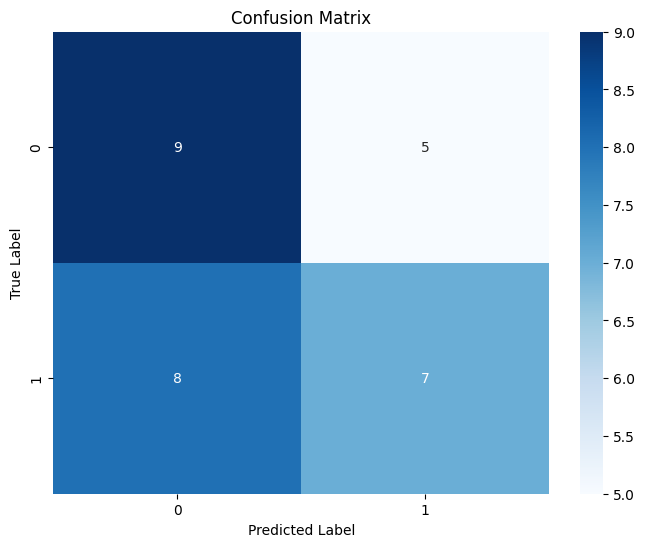

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Flatten the Y_train and Y_test arrays
Y_train = np.ravel(Y_train)
Y_test = np.ravel(Y_test)

# Create a Logistic Regression model
model = LogisticRegression(C=1e6, multi_class='multinomial', solver='lbfgs')

# Train the model on the training data
model.fit(X_train_fx, Y_train)

# Make predictions on the validation data
y_pred = model.predict(X_test_fx)

# Calculate the validation accuracy
validation_accuracy = accuracy_score(Y_test, y_pred)

# Print the rounded accuracy
print(f"Validation Accuracy: {round(validation_accuracy, 2)}")

# Compute the confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred)

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Results:

Regretfully, there have been a lot of incorrectly classified outcomes when it comes to logistic regression.



This is because the data set is small and may be equivalent in terms of numerical components—for example, there might be a same number of yellow pixels in an image of rice and an image of chips.

2.Apllying k-neighbours.

The training accuracy for k=7 is 0.6714285714285714
The validation accuracy for k=7 is 0.5517241379310345


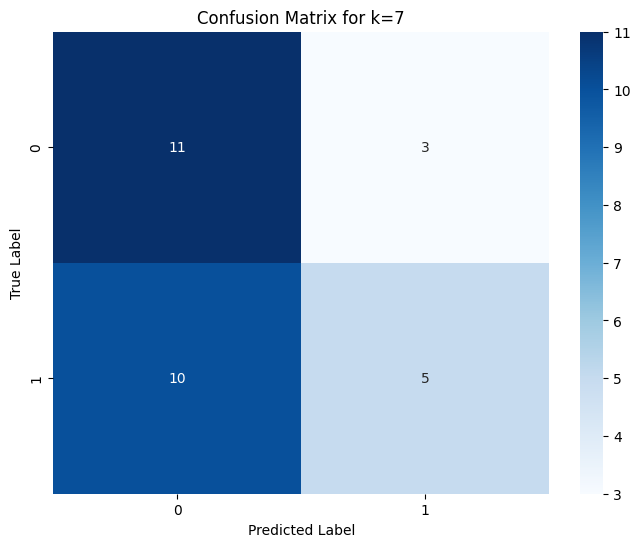

The training accuracy for k=17 is 0.5862068965517241
The validation accuracy for k=17 is 0.6142857142857143


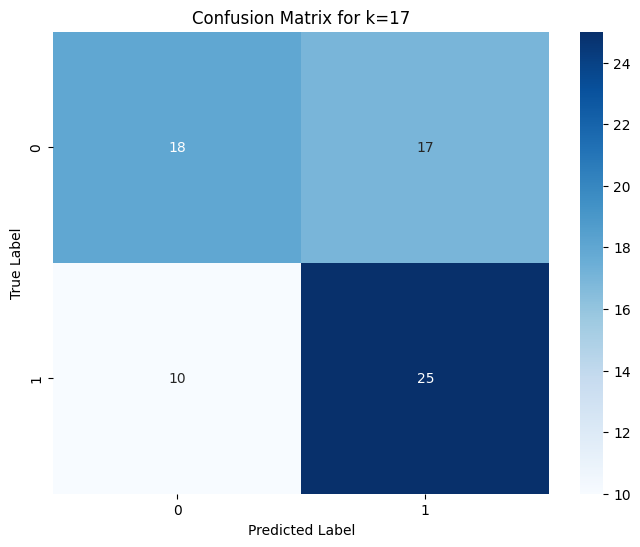

In [ ]:
from sklearn import neighbors

# Set the value of k
k = 7

# Create the kNN model
knn = neighbors.KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_fx, Y_train)

# Predictions on the validation data
y_val_pred = knn.predict(X_test_fx)

# Calculate training and validation accuracy
accuracy_t = np.sum(Y_train == knn.predict(X_train_fx)) / len(Y_train)
accuracy_v = np.sum(Y_test == y_val_pred) / len(Y_test)

print(f"The training accuracy for k={k} is {accuracy_t}")
print(f"The validation accuracy for k={k} is {accuracy_v}")

# Compute and display the confusion matrix for validation data
conf_matrix = confusion_matrix(Y_test, y_val_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for k=' + str(k))
plt.show()

# Set a new value for k
k = 17

# Create the kNN model with the new k value
knn = neighbors.KNeighborsClassifier(n_neighbors=k)
knn.fit(X_test_fx, Y_test)

# Predictions on the training data
y_train_pred = knn.predict(X_train_fx)

# Calculate training and validation accuracy with the new k value
accuracy_t2 = np.sum(Y_test == knn.predict(X_test_fx)) / len(Y_test)
accuracy_v2 = np.sum(Y_train == y_train_pred) / len(Y_train)

print(f"The training accuracy for k={k} is {accuracy_t2}")
print(f"The validation accuracy for k={k} is {accuracy_v2}")

# Compute and display the confusion matrix for training data with the new k value
conf_matrix2 = confusion_matrix(Y_train, y_train_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for k=' + str(k))
plt.show()


Results:

Although the outcome is better here, it is still far from ideal. A cross-fold validation is an alternate that enables performance evaluation over several folds.



Finding distinct parameters would be an additional option when attempting to accurately classify these two.







the acquired accuracy was high.

# 9 Conclusions

In conclusion, our exploration of binary classification for distinguishing images featuring dishes with rice and chips involved the implementation of two models: Logistic Regression and k-Nearest Neighbors (k-NN). We acknowledged the challenges inherent in a limited dataset and sought to evaluate the models within these constraints.

The logistic regression model, while straightforward, faced limitations in accurately classifying images due to potential similarities in numerical features, hindering the establishment of an effective linear decision boundary. On the other hand, the k-NN model provided a more adaptable approach with the flexibility for non-linear decision boundaries. Initial experiments with k=7 showed improved accuracy compared to logistic regression, but further fine-tuning with a higher k value (k=17) resulted in unexpected outcomes, emphasizing the sensitivity of the k-NN algorithm to parameter selection.

Considering the constrained dataset, scaling up to a larger sample size could potentially enhance generalization. Additionally, exploring advanced feature engineering techniques and optimizing models through hyperparameter tuning are crucial for refining the performance of both logistic regression and k-NN. In logistic regression, adjustments were made to parameters such as regularization strength (C), multi-class handling, and solver, while the k-NN model's pivotal parameter was the number of neighbors (k).

Furthermore, contemplating advanced models like Convolutional Neural Networks (CNNs) designed for image classification may yield superior results in this binary classification task. In essence, our initial models provided valuable insights into the challenges of classifying rice and chips images. However, ongoing refinement and exploration are essential to achieve a reliable and accurate solution. The journey continues with a commitment to addressing these challenges and leveraging advanced methodologies for enhanced performance.